<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>A1: Linear Modeling Case Study</h2>
<h4>DAT-5390 | Computational Data Analytics with Python</h4>
Hsiao Yu (Vivi) Chen<br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part I: Imports and Data Check</h2>

In [941]:
## importing libraries ##

# for this template
import numpy             as np                       # mathematical essentials
import pandas            as pd                       # data science essentials
import sklearn.linear_model                          # linear models
from sklearn.model_selection import train_test_split # train/test split


#!###############################!#
#!# import additional libraries #!#
#!###############################!#
# import whatever you need
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.linear_model import Lasso # Lasso Regression
from sklearn.preprocessing import StandardScaler  # standard scaler
from sklearn.linear_model import Ridge  # Ridge Regression


# setting pandas print options (optional)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<br>

In [942]:
## importing data ##

# reading modeling data into Python
modeling_data = './datasets/train.xlsx'

# calling this df_train
df_train = pd.read_excel(io         = modeling_data,
                         sheet_name = 'data',
                         header     = 0,
                         index_col  = 'ID')



# reading testing data into Python
testing_data = './datasets/test.xlsx'

# calling this df_test
df_test = pd.read_excel(io         = testing_data,
                        sheet_name = 'data',
                        header     = 0,
                        index_col  = 'ID')

<br>

In [943]:
# concatenating datasets together for mv analysis and feature engineering
df_train['set'] = 'Not Kaggle'
df_test ['set'] = 'Kaggle'

# concatenating both datasets together for mv and feature engineering
df_full = pd.concat(objs = [df_train, df_test],
                    axis = 0,
                    ignore_index = False)


# checking data
df_full.head(n = 5)

,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS,set
ID,,,,,,,,,,,,,
mb_1039,2023-10-14 05:59:54.810000,52,81,0.4,2.9,46.4,0.0,0.0,0.00,No,Yes,519.0,Not Kaggle
mb_1330,2023-10-26 08:59:53.355000,51,53,2.2,NaN,35.2,0.0,0.0,1.01,No,Yes,1251.0,Not Kaggle
mb_551,2023-09-23 21:59:57.250000,56,49,2.5,3.4,38.8,0.0,0.0,0.00,No,Yes,1685.0,Not Kaggle
mb_2103,2023-12-19 14:00:00,69,32,9.8,12.4,38.7,0.0,0.0,2.36,No,No,0.0,Not Kaggle
mb_1430,2023-10-30 12:59:52.855000,53,20,2.9,10.8,12.9,0.0,0.0,1.96,No,Yes,814.0,Not Kaggle


<br>

In [944]:
# checking available features
column_names = df_full.columns.tolist()
print(column_names)

['DateHour', 'Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)', 'DewPointTemperature(F)', 'Rainfall(in)', 'Snowfall(in)', 'SolarRadiation(MJ/m2)', 'Holiday', 'FunctioningDay', 'RENTALS', 'set']


<br>

In [945]:
# descriptive statistics
df_full.describe()

,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),RENTALS
count,2184.000000,2184.000000,2184.000000,2108.000000,2117.000000,2184.000000,2184.000000,2078.000000,1638.000000
mean,57.389652,59.228480,3.344780,9.646964,42.036089,0.004858,0.002015,0.547161,828.153846
std,12.861669,18.686445,2.071144,3.492413,13.997667,0.037354,0.018550,0.810564,657.599846
min,26.000000,13.000000,0.000000,0.000000,-2.200000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,44.000000,1.800000,7.400000,33.400000,0.000000,0.000000,0.000000,241.500000
50%,57.000000,59.000000,2.900000,11.700000,41.900000,0.000000,0.000000,0.000000,761.500000
75%,68.000000,74.000000,4.500000,12.400000,51.600000,0.000000,0.000000,0.980000,1203.750000
max,91.000000,97.000000,12.800000,12.400000,75.000000,0.710000,0.300000,3.180000,3303.000000


In [947]:
#!##############################!#
#!# set your response variable #!#
#!##############################!#
y_variable = 'RENTALS' # this should be a string

<br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part II: Data Preparation</h2><br>
Complete the following steps to prepare for model building. Note that you may add or remove steps as you see fit. Please see the assignment description for details on what steps are required for this project.
<br><br>
<h3>Base Modeling</h3>

In [948]:
## Base Modeling ##

# Define the regression formula for the model. The target variable is 'RENTALS', 
# and the predictors include 'Temperature(F)','Humidity(%)', 'Rainfall(in)', 'Holiday', and 'FunctioningDay'.
formula = "Q('RENTALS') ~ Q('Temperature(F)') + Q('Humidity(%)') + Q('Rainfall(in)') + Q('Holiday') + Q('FunctioningDay')"
lm_best = smf.ols(formula=formula, data=df_full)

# Step 2: FIT the data into the model object
results = lm_best.fit()

# Step 3: analyze the SUMMARY output
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:           Q('RENTALS')   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     280.9
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          5.08e-217
Time:                        23:04:20   Log-Likelihood:                -12444.
No. Observations:                1638   AIC:                         2.490e+04
Df Residuals:                    1632   BIC:                         2.493e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

<br><h3>Missing Value Analysis and Imputation</h3>

In [949]:
# Missing value 
missing_counts = df_full.isnull().sum(axis=0)
missing_percentages = df_full.isnull().mean(axis=0)
missing_info = pd.DataFrame({'Missing Count': missing_counts, 
                             'Missing Percentage': missing_percentages})
print(missing_info)

                        Missing Count  Missing Percentage
DateHour                            0            0.000000
Temperature(F)                      0            0.000000
Humidity(%)                         0            0.000000
Wind speed (mph)                    0            0.000000
Visibility(miles)                  76            0.034799
DewPointTemperature(F)             67            0.030678
Rainfall(in)                        0            0.000000
Snowfall(in)                        0            0.000000
SolarRadiation(MJ/m2)             106            0.048535
Holiday                             0            0.000000
FunctioningDay                      0            0.000000
RENTALS                           546            0.250000
set                                 0            0.000000


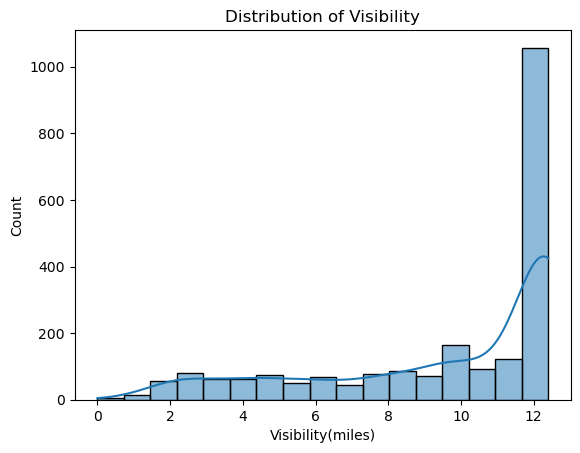

In [950]:
# Visibility(miles)  
df_full['Visibility(miles)'].fillna(value   = df_full['Visibility(miles)'].mean(),
                                    inplace = True)
# df_full[x].fillna(value = df_full[x].median(),inplace = True)

sns.histplot(x = 'Visibility(miles)',
            data = df_full,
            kde = True)


# title and labels
plt.title (label  = 'Distribution of Visibility')
plt.xlabel(xlabel = 'Visibility(miles)')
plt.ylabel(ylabel = 'Count')

# displaying the plot
plt.show()

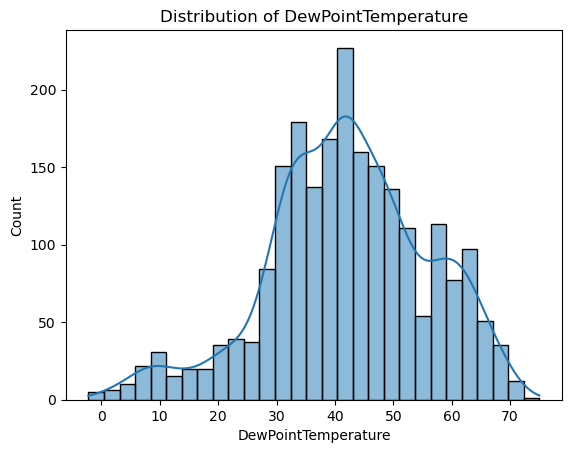

In [951]:
# DewPointTemperature(F)
df_full['DewPointTemperature(F)'].fillna(value   =df_full['DewPointTemperature(F)'].mean(),
                                         inplace = True)
sns.histplot(x = 'DewPointTemperature(F)',
            data = df_full,
            kde = True)


# title and labels
plt.title (label  = 'Distribution of DewPointTemperature')
plt.xlabel(xlabel = 'DewPointTemperature')
plt.ylabel(ylabel = 'Count')


# displaying the plot
plt.show()

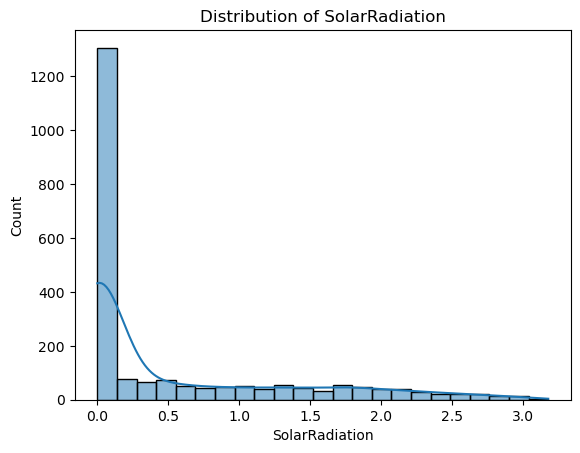

In [952]:
# SolarRadiation
df_full['SolarRadiation(MJ/m2)'].fillna(value   = 0   ,
                                         inplace = True)
sns.histplot(x = 'SolarRadiation(MJ/m2)',
            data = df_full,
            kde = True)

# title and labels
plt.title (label  = 'Distribution of SolarRadiation')
plt.xlabel(xlabel = 'SolarRadiation')
plt.ylabel(ylabel = 'Count')

# displaying the plot
plt.show()

In [953]:
# Change Holiday,FunctioningDay Yes =1, No = 0
df_full['Holiday'] = df_full['Holiday'].replace('Yes', 1).infer_objects(copy=False)
df_full['Holiday'] = df_full['Holiday'].replace('No', 0).infer_objects(copy=False)
df_full['FunctioningDay'] = df_full['FunctioningDay'].replace('Yes', 1).infer_objects(copy=False)
df_full['FunctioningDay'] = df_full['FunctioningDay'].replace('No', 0).infer_objects(copy=False)

In [954]:
# Correlation of RENTALS with other columns
# Choose numeric value
numeric_df = df_full.select_dtypes(include=[np.number])

# Correlation
correlation_matrix = numeric_df.corr().round(decimals=2)

# Correlation of RENTALS with other columns
print("Correlation of RENTALS with other columns:")
print(correlation_matrix.loc['RENTALS'])

Correlation of RENTALS with other columns:
Temperature(F)            0.32
Humidity(%)              -0.40
Wind speed (mph)          0.19
Visibility(miles)         0.00
DewPointTemperature(F)    0.03
Rainfall(in)             -0.15
Snowfall(in)             -0.09
SolarRadiation(MJ/m2)     0.20
Holiday                  -0.03
FunctioningDay            0.45
RENTALS                   1.00
Name: RENTALS, dtype: float64


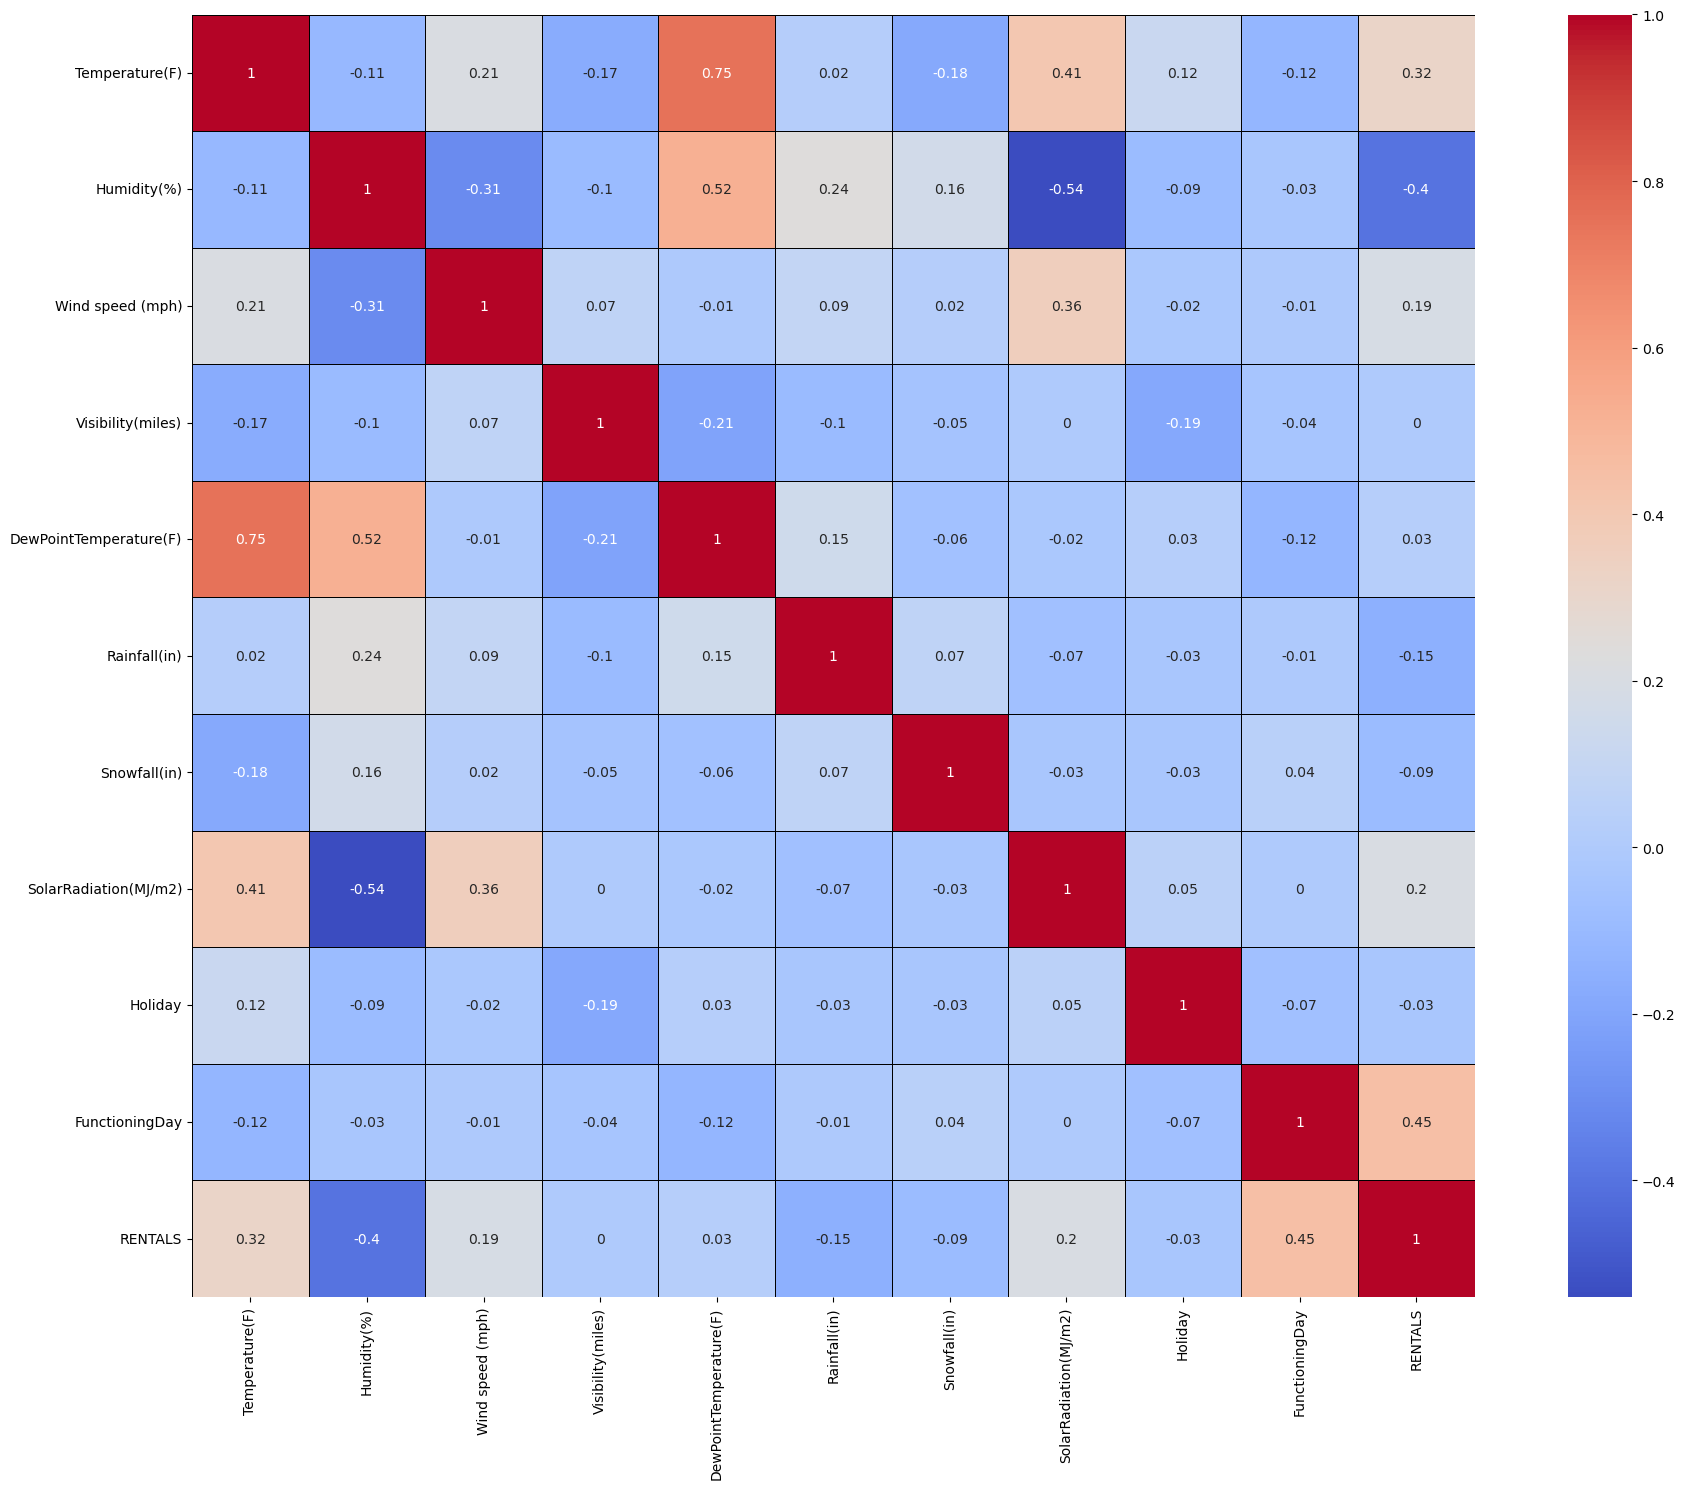

In [955]:
# Visualize Correlation of RENTALS with other columns
# setting figure size
fig, ax = plt.subplots(figsize=(20,15))


# visualizing the correlation matrix
sns.heatmap(correlation_matrix,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)


# layout and rendering
plt.tight_layout()
plt.show()

<br><h3>Feature Engineering</h3>

In [956]:
# Feature Engineering 1: Discomfort Index

df_full['DiscomfortIndex'] = df_full['Temperature(F)'] * df_full['Humidity(%)']

# Feature Engineering 2: Is Raining & Snowing
df_full['IsRaining&Snowing'] = df_full['Rainfall(in)']+ df_full['Snowfall(in)']

# Feature Engineering 3: Highlight the ExtremeTemperature, utilizing the temperature data from df_full to define the range more closely aligned with our data.
# Calculate the 10th and 90th percentiles of the temperature in the training set
cold_threshold = df_full['Temperature(F)'].quantile(0.10)
hot_threshold = df_full['Temperature(F)'].quantile(0.90)

# Create extreme temperature features based on these percentiles
df_full['ExtremeCold'] = (df_full['Temperature(F)'] < cold_threshold).astype(int)
df_full['ExtremeHot'] = (df_full['Temperature(F)'] > hot_threshold).astype(int)

In [957]:
# Feature Engineering 4: Meteorological Conditions Composition
# Muggy: Indicates whether the weather is muggy, characterized by high temperature (>75°F) and high humidity (>60%)
df_full['Muggy'] = ((df_full['Temperature(F)']> 75) & (df_full['Humidity(%)'] > 60)).astype(int)
# ColdDry: Indicates whether the weather is cold and dry, characterized by low temperature (<32°F) and low humidity (<35%)
df_full['ColdDry'] = ((df_full['Temperature(F)'] < 32) & (df_full['Humidity(%)'] < 35)).astype(int)

In [958]:
# Feature Engineering 5: Heat Index
# Calculates the perceived temperature accounting for humidity, commonly known as the heat index
df_full['heat_index'] = 0.5 * (df_full['Temperature(F)'] + 61.0 + ((df_full['Temperature(F)']-68.0)*1.2) + (df_full['Humidity(%)']*0.094))

In [959]:
# Make sure DateHour is datetime type
df_full['DateHour'] = pd.to_datetime(df_full['DateHour'], format='mixed')

# Create a new Date column
df_full['Date'] = df_full['DateHour'].dt.date

# Create a new Time column
df_full['Time'] = df_full['DateHour'].dt.time

# Extract the month
df_full['Month'] = df_full['DateHour'].dt.month

# Extract the hour
df_full['Hour'] = df_full['DateHour'].dt.hour

# Feature Engineering 6: Update time-of-day columns based on the hour of the day and assign binary values (1 or 0) to each new column
def update_time_of_day_columns(row): 
    hour = row['DateHour'].hour # Extract the hour from the 'DateHour' column in the current row
     # Initialize all time-of-day columns to 0
    row['Morning'] = 0
    row['Afternoon'] = 0
    row['Evening'] = 0
    row['Night'] = 0
    # Assign 1 to the corresponding time-of-day column based on the hour
    if 5 <= hour < 12:
        row['Morning'] = 1
    elif 12 <= hour < 17:
        row['Afternoon'] = 1
    elif 17 <= hour < 21:
        row['Evening'] = 1
    else:
        row['Night'] = 1
    return row
# Applying the function 'update_time_of_day_columns' to each row of the DataFrame 'df_full'
df_full = df_full.apply(update_time_of_day_columns, axis=1)

In [961]:
df_full.head(n=10)

,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS,set,DiscomfortIndex,IsRaining&Snowing,ExtremeCold,ExtremeHot,Muggy,ColdDry,heat_index,Date,Time,Month,Hour,Morning,Afternoon,Evening,Night
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mb_1039,2023-10-14 05:59:54.810,52,81,0.4,2.900000,46.4,0.0,0.0,0.00,0,1,519.0,Not Kaggle,4212,0.0,0,0,0,0,50.707,2023-10-14,05:59:54.810000,10,5,1,0,0,0
mb_1330,2023-10-26 08:59:53.355,51,53,2.2,9.646964,35.2,0.0,0.0,1.01,0,1,1251.0,Not Kaggle,2703,0.0,0,0,0,0,48.291,2023-10-26,08:59:53.355000,10,8,1,0,0,0
mb_551,2023-09-23 21:59:57.250,56,49,2.5,3.400000,38.8,0.0,0.0,0.00,0,1,1685.0,Not Kaggle,2744,0.0,0,0,0,0,53.603,2023-09-23,21:59:57.250000,9,21,0,0,0,1
mb_2103,2023-12-19 14:00:00.000,69,32,9.8,12.400000,38.7,0.0,0.0,2.36,0,0,0.0,Not Kaggle,2208,0.0,0,0,0,0,67.104,2023-12-19,14:00:00,12,14,0,1,0,0
mb_1430,2023-10-30 12:59:52.855,53,20,2.9,10.800000,12.9,0.0,0.0,1.96,0,1,814.0,Not Kaggle,1060,0.0,0,0,0,0,48.940,2023-10-30,12:59:52.855000,10,12,0,1,0,0
mb_781,2023-10-03 11:59:56.100,50,72,4.5,11.700000,42.3,0.0,0.0,0.30,0,1,731.0,Not Kaggle,3600,0.0,0,0,0,0,48.084,2023-10-03,11:59:56.100000,10,11,1,0,0,0
mb_1642,2023-11-30 09:00:00.000,28,33,2.0,9.600000,3.7,0.0,0.0,0.56,0,1,800.0,Not Kaggle,924,0.0,1,0,0,1,22.051,2023-11-30,09:00:00,11,9,1,0,0,0
mb_870,2023-10-07 04:59:55.655,72,70,2.7,8.100000,58.6,0.0,0.0,0.00,0,1,260.0,Not Kaggle,5040,0.0,0,0,0,0,72.190,2023-10-07,04:59:55.655000,10,4,0,0,0,1
mb_1483,2023-11-23 18:00:00.000,61,41,3.1,12.400000,37.2,0.0,0.0,0.06,0,1,1699.0,Not Kaggle,2501,0.0,0,0,0,0,58.727,2023-11-23,18:00:00,11,18,0,0,1,0


<br><h3>Transformations</h3>

In [962]:
# Transformations
df_full['log_Temperature'] = np.log1p(df_full['Temperature(F)'])
df_full['log_Humidity'] = np.log1p(df_full['Humidity(%)'])
df_full['log_Wind_speed'] = np.log1p(df_full['Wind speed (mph)'])
df_full['log_Visibility'] = np.log1p(df_full['Visibility(miles)'])
df_full['log_DewPointTemperature'] = np.log1p(df_full['DewPointTemperature(F)'])
df_full['log_Rainfall'] = np.log1p(df_full['Rainfall(in)'])
df_full['log_Snowfall'] = np.log1p(df_full['Snowfall(in)'])
df_full['log_SolarRadiation'] = np.log1p(df_full['SolarRadiation(MJ/m2)'])
df_full['log_Holiday'] = np.log1p(df_full['Holiday'])
df_full['log_FunctioningDay'] = np.log1p(df_full['FunctioningDay'])
df_full['log_RENTALS'] = np.log1p(df_full['RENTALS'])
df_full['log_DiscomfortIndex'] = np.log1p(df_full['DiscomfortIndex'])
df_full['log_IsRaining&Snowing'] = np.log1p(df_full['IsRaining&Snowing'])
df_full['log_ExtremeCold'] = np.log1p(df_full['ExtremeCold'])
df_full['log_ExtremeHot'] = np.log1p(df_full['ExtremeHot'])
df_full['log_Muggy'] = np.log1p(df_full['Muggy'])
df_full['log_ColdDry'] = np.log1p(df_full['ColdDry'])
df_full['log_heat_index'] = np.log1p(df_full['heat_index'])
df_full['log_Month'] = np.log1p(df_full['Month'])
df_full['log_Hour'] = np.log1p(df_full['Hour'])
df_full['log_Morning'] = np.log1p(df_full['Morning'])
df_full['log_Afternoon'] = np.log1p(df_full['Afternoon'])
df_full['log_Evening'] = np.log1p(df_full['Evening'])
df_full['log_Night'] = np.log1p(df_full['Night'])

In [963]:
# Correlation of RENTALS with other columns
# Choose numeric value
numeric_df = df_full.select_dtypes(include=[np.number])

# Correlation
correlation_matrix = numeric_df.corr().round(decimals=2)

# Correlation of RENTALS with other columns
print("Correlation of RENTALS with other columns:")
print(correlation_matrix.loc['RENTALS'])

Correlation of RENTALS with other columns:
Temperature(F)             0.32
Humidity(%)               -0.40
Wind speed (mph)           0.19
Visibility(miles)          0.00
DewPointTemperature(F)     0.03
Rainfall(in)              -0.15
Snowfall(in)              -0.09
SolarRadiation(MJ/m2)      0.20
Holiday                   -0.03
FunctioningDay             0.45
RENTALS                    1.00
DiscomfortIndex           -0.17
IsRaining&Snowing         -0.16
ExtremeCold               -0.12
ExtremeHot                 0.29
Muggy                      0.07
ColdDry                    0.02
heat_index                 0.30
Month                     -0.01
Hour                       0.42
Morning                   -0.10
Afternoon                  0.18
Evening                    0.37
Night                     -0.35
log_Temperature            0.30
log_Humidity              -0.37
log_Wind_speed             0.21
log_Visibility            -0.01
log_DewPointTemperature    0.03
log_Rainfall              -0.

In [964]:
# Skewness Calculation
# Selecting columns with numerical data types
numeric_cols = df_full.select_dtypes(include=[np.number])

# Compute the skewness of columns with numerical data types
numeric_cols.skew().round(decimals=2)

Temperature(F)              0.04
Humidity(%)                 0.02
Wind speed (mph)            1.04
Visibility(miles)          -1.03
DewPointTemperature(F)     -0.34
Rainfall(in)               11.91
Snowfall(in)               11.45
SolarRadiation(MJ/m2)       1.42
Holiday                     3.91
FunctioningDay             -2.44
RENTALS                     0.72
DiscomfortIndex             0.43
IsRaining&Snowing           9.99
ExtremeCold                 2.91
ExtremeHot                  2.90
Muggy                       7.71
ColdDry                    33.02
heat_index                  0.01
Month                       0.47
Hour                        0.00
Morning                     0.92
Afternoon                   1.44
Evening                     1.79
Night                       0.71
log_Temperature            -0.39
log_Humidity               -0.69
log_Wind_speed             -0.34
log_Visibility             -1.65
log_DewPointTemperature    -2.77
log_Rainfall               10.66
log_Snowfa

In [965]:
## Base Modeling ##
# formula = "Q(column_names[11]) ~ Q(column_names[1]) + Q(column_names[2]) + Q(column_names[6]) + Q(column_names[9]) + Q(column_names[10])"
formula = "Q('RENTALS') ~ Q('SolarRadiation(MJ/m2)') + Q('Holiday') + Q('FunctioningDay') + Q('DiscomfortIndex')+ Q('IsRaining&Snowing')+ Q('ExtremeCold')+ Q('ColdDry')+ Q('heat_index')+ Q('Hour')+ Q('Morning')+ Q('Afternoon')+ Q('Evening')+ Q('Night')+ Q('log_Temperature')+ Q('log_Humidity')+ Q('log_SolarRadiation')+ Q('log_DiscomfortIndex')+ Q('log_IsRaining&Snowing')+ Q('log_Month') + Q('log_Hour')"
lm_best = smf.ols(formula=formula, data=df_full)

# Step 2: FIT the data into the model object
results = lm_best.fit()

# Step 3: analyze the SUMMARY output
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:           Q('RENTALS')   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     174.2
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:05:31   Log-Likelihood:                -12040.
No. Observations:                1638   AIC:                         2.412e+04
Df Residuals:                    1618   BIC:                         2.423e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

<br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part III: Data Partitioning</h2><br>
This is a very important step for your submission on Kaggle. Make sure to complete your data preparationbefore moving forward.
<br>
<br><h3>Separating the Kaggle Data</h3><br>

In [966]:
## parsing out testing data (needed for later) ##

# dataset for kaggle
kaggle_data = df_full[ df_full['set'] == 'Kaggle' ].copy()


# dataset for model building
df = df_full[ df_full['set'] == 'Not Kaggle' ].copy()


# dropping set identifier (kaggle)
kaggle_data.drop(labels = 'set',
                 axis = 1,
                 inplace = True)


# dropping set identifier (model building)
df.drop(labels = 'set',
        axis = 1,
        inplace = True)

<br><h3>Train-Test Split</h3><br>
Note that the following code will remove non-numeric features, keeping only integer and float data types. It will also remove any observations that contain missing values. This is to prevent errors in the model building process. 

In [970]:
#!###########################!#
#!# choose your x-variables #!#
#!###########################!#
x_features = ['SolarRadiation(MJ/m2)','Holiday','FunctioningDay','DiscomfortIndex','IsRaining&Snowing','ExtremeCold','ColdDry',
              'heat_index','Hour','Morning','Afternoon','Evening','Night','log_Temperature','log_Humidity','log_SolarRadiation','log_DiscomfortIndex','log_IsRaining&Snowing',
              'log_SolarRadiation','log_DiscomfortIndex','log_ExtremeCold','log_ColdDry','log_heat_index','log_Month',
              'log_Month','log_Hour']# this should be a list





<br><h3>Standardization</h3>

In [971]:
 # # INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# # FITTING and TRANSFORMING
x_scaled = scaler.fit_transform(x_data)


# # converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# # labeling columns
x_scaled_df.columns = x_data.columns


x_data = x_scaled_df.copy()

# # checking the results
x_data.describe(include = 'number').round(decimals = 2)

,SolarRadiation(MJ/m2),Holiday,FunctioningDay,DiscomfortIndex,IsRaining&Snowing,ExtremeCold,ColdDry,heat_index,Hour,Morning,Afternoon,Evening,Night,log_Temperature,log_Humidity,log_SolarRadiation,log_DiscomfortIndex,log_IsRaining&Snowing,log_SolarRadiation,log_DiscomfortIndex,log_ExtremeCold,log_ColdDry,log_heat_index,log_wind_chill,log_Month,log_Month,log_Hour
count,1638.00,1638.00,1638.00,1638.00,1638.00,1638.00,1638.00,1638.00,1638.00,1638.00,1638.00,1638.00,1638.00,1638.00,1638.00,1638.00,1638.00,1638.00,1638.00,1638.00,1638.00,1638.00,1638.00,1638.00,1638.00,1638.00,1638.00
mean,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.65,-0.24,-2.82,-2.24,-0.15,-0.31,-0.03,-2.49,-1.66,-0.63,-0.51,-0.46,-0.72,-3.24,-4.11,-0.71,-4.05,-0.16,-0.71,-4.05,-0.31,-0.03,-3.57,-3.50,-1.11,-1.11,-2.80
25%,-0.65,-0.24,0.35,-0.67,-0.15,-0.31,-0.03,-0.76,-0.94,-0.63,-0.51,-0.46,-0.72,-0.74,-0.69,-0.71,-0.51,-0.16,-0.71,-0.51,-0.31,-0.03,-0.67,-0.68,-1.11,-1.11,-0.60
50%,-0.65,-0.24,0.35,-0.10,-0.15,-0.31,-0.03,-0.04,0.06,-0.63,-0.51,-0.46,-0.72,0.09,0.16,-0.71,0.10,-0.16,-0.71,0.10,-0.31,-0.03,0.09,0.09,-0.16,-0.16,0.34
75%,0.46,-0.24,0.35,0.58,-0.15,-0.31,-0.03,0.78,0.92,1.59,-0.51,-0.46,1.40,0.82,0.77,0.75,0.66,-0.16,0.75,0.66,-0.31,-0.03,0.80,0.80,0.70,0.70,0.81
max,3.36,4.25,0.35,3.10,16.65,3.25,28.60,2.56,1.64,1.59,1.97,2.20,1.40,2.09,1.59,2.59,2.05,14.99,2.59,2.05,3.25,28.60,1.99,2.05,1.49,1.49,1.09


<br>

In [972]:
## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# prepping data for train-test split
y_data = df[y_variable]


# removing non-numeric columns and missing values
x_data = df[x_features].copy().select_dtypes(include=[int, float]).dropna(axis = 1)


# storing remaining x_features after the step above
x_features = list(x_data.columns)


# train-test split (to validate the model)
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size    = 0.25,
                                                    random_state = 702 )


# results of train-test split
print(f"""
Original Dataset Dimensions
---------------------------
Observations (Rows): {df.shape[0]}
Features  (Columns): {df.shape[1]}


Training Data (X-side)
----------------------
Observations (Rows): {x_train.shape[0]}
Features  (Columns): {x_train.shape[1]}


Training Data (y-side)
----------------------
Feature Name:        {y_train.name}
Observations (Rows): {y_train.shape[0]}


Testing Data (X-side)
---------------------
Observations (Rows): {x_test.shape[0]}
Features  (Columns): {x_test.shape[1]}


Testing Data (y-side)
---------------------
Feature Name:        {y_test.name}
Observations (Rows): {y_test.shape[0]}""")


Original Dataset Dimensions
---------------------------
Observations (Rows): 1638
Features  (Columns): 51


Training Data (X-side)
----------------------
Observations (Rows): 1228
Features  (Columns): 26


Training Data (y-side)
----------------------
Feature Name:        RENTALS
Observations (Rows): 1228


Testing Data (X-side)
---------------------
Observations (Rows): 410
Features  (Columns): 26


Testing Data (y-side)
---------------------
Feature Name:        RENTALS
Observations (Rows): 410


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part III: Candidate Modeling</h2><br>
Develop your candidate models below.

In [973]:
## Hyperparameter Tuning ##
from sklearn.tree import DecisionTreeRegressor         # regression trees
from sklearn.tree import plot_tree                     # tree plots
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.linear_model import Ridge
import warnings                                        # warnings from code
# suppressing warnings
warnings.filterwarnings(action = 'ignore')

<br>
<h3>OLS Linear Regression</h3><br>

In [974]:
# naming the model
model_name = 'Linear' # name your model

# model type
model = sklearn.linear_model.LinearRegression() # model type ( ex: sklearn.linear_model.LinearRegression() )

In [975]:
## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

Model Name:     Linear
Train_Score:    0.6699
Test_Score:     0.6725
Train-Test Gap: 0.0026



<br>
<h3>Model Results</h3><br>

In [976]:
## Model Results ##
# zipping each feature name to its coefficient
model_coefficients = zip(x_train.columns,
                         model.coef_.round(decimals = 4))


# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 4))]


# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)
    

# checking the results
for pair in coefficient_lst:
    print(pair)


('intercept', -16872.9665)
('SolarRadiation(MJ/m2)', -609.3079)
('Holiday', -158.4417)
('FunctioningDay', 1032.2819)
('DiscomfortIndex', -0.5108)
('IsRaining&Snowing', 12532.0084)
('ExtremeCold', 101.8161)
('ColdDry', 441.2655)
('heat_index', 25.6217)
('Hour', 46.7827)
('Morning', 55.7645)
('Afternoon', -32.7554)
('Evening', 261.9375)
('Night', -284.9466)
('log_Temperature', 39065.2767)
('log_Humidity', 36070.8008)
('log_SolarRadiation', 492.8013)
('log_DiscomfortIndex', -17069.0063)
('log_IsRaining&Snowing', -16679.0578)
('log_SolarRadiation', 492.8013)
('log_DiscomfortIndex', -17069.0063)
('log_ExtremeCold', 70.5736)
('log_ColdDry', 305.8619)
('log_heat_index', -2849.8784)
('log_Month', -92.5672)
('log_Month', -92.5672)
('log_Hour', -230.3714)


In [977]:
## Residual Analysis ##

# organizing residuals
model_residuals = {"True"            : y_test,
                   "Predicted"       : model_pred
                  }


# converting residuals into df
model_resid_df = pd.DataFrame(data = model_residuals)


# checking results
model_resid_df.head(n = 5)

,True,Predicted
ID,,
mb_1509,908.0,1203.826942
mb_559,131.0,346.141036
mb_040,1208.0,1288.082658
mb_1346,291.0,489.234121
mb_1463,1433.0,837.377726


<br>
<h3>Lasso Regression </h3><br>

In [978]:
## Candidate Modeling ##
# naming the model
model_name = 'Lasso' # name your model

# model type
model = sklearn.linear_model.Lasso() # model type ( ex: sklearn.linear_model.LinearRegression() )

In [979]:
## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

Model Name:     Lasso
Train_Score:    0.6569
Test_Score:     0.6489
Train-Test Gap: 0.008



<br>
<h3>Hyperparameter Tuning - Lasso Regression </h3><br>

In [980]:
# creating a hyperparameter grid
alpha_range = np.logspace(-4, 1, 50)  # Create 50 logarithmically spaced points between 10^-4 and 10^1


# Create a grid of hyperparameters
param_dist = {'alpha': alpha_range}

# INSTANTIATING the model object without hyperparameters
lasso = Lasso(random_state=219)

# RandomizedSearchCV object
lasso_rand_cv = RandomizedSearchCV(estimator=lasso,   # Model
                                   param_distributions=param_dist,  # Hyperparameter ranges
                                   n_iter=100,        # Build 100 models
                                   cv=5,               # Number of folds
                                   scoring='r2',      # Use R^2 as scoring metric
                                   random_state=219)   # Random seed
                                         

# Fit the RandomizedSearchCV object based on the training data
lasso_rand_cv.fit(x_data, y_data)

# Print the best parameters and best score
print("Tuned Parameters  :", lasso_rand_cv.best_params_)
print("Tuned CV R-squared:", lasso_rand_cv.best_score_.round(4))

Tuned Parameters  : {'alpha': 0.010985411419875584}
Tuned CV R-squared: 0.6548


In [981]:
# naming the model
model_name = 'Lasso'

# INSTANTIATING a Ridge regression model with tuned values
model = Lasso(alpha=0.010985411419875584)

# FITTING to the TRAINING data
model.fit(x_train, y_train)

# PREDICTING based on the testing set
model.predict(x_test)

# SCORING results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score = model.score(x_test, y_test).round(4)
model_gap = abs(model_train_score - model_test_score).round(4)

# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.6678
Testing Score  : 0.6658
Train-Test Gap : 0.002


<br>
<h3>Model Results</h3><br>

In [982]:
## Model Results ##
# zipping each feature name to its coefficient
model_coefficients = zip(x_train.columns,
                         model.coef_.round(decimals = 4))


# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 4))]


# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)
    

# checking the results
for pair in coefficient_lst:
    print(pair)


('intercept', -1289.3816)
('SolarRadiation(MJ/m2)', -589.7388)
('Holiday', -150.0319)
('FunctioningDay', 1024.9515)
('DiscomfortIndex', -0.3734)
('IsRaining&Snowing', 10378.934)
('ExtremeCold', -784.2799)
('ColdDry', 671.4658)
('heat_index', 40.0408)
('Hour', 45.062)
('Morning', 120.8478)
('Afternoon', 40.5787)
('Evening', 321.86)
('Night', -217.9976)
('log_Temperature', -1186.6766)
('log_Humidity', 398.4943)
('log_SolarRadiation', 943.279)
('log_DiscomfortIndex', 6.7535)
('log_IsRaining&Snowing', -14014.3717)
('log_SolarRadiation', -0.0)
('log_DiscomfortIndex', 180.8885)
('log_ExtremeCold', 1332.6872)
('log_ColdDry', 0.0)
('log_heat_index', 579.243)
('log_Month', -175.6087)
('log_Month', -0.0)
('log_Hour', -220.4706)


In [983]:
## Residual Analysis ##

# organizing residuals
model_residuals = {"True"            : y_test,
                   "Predicted"       : model_pred
                  }


# converting residuals into df
model_resid_df = pd.DataFrame(data = model_residuals)


# checking results
model_resid_df.head(n = 5)


,True,Predicted
ID,,
mb_1509,908.0,1257.032287
mb_559,131.0,514.098970
mb_040,1208.0,1273.368691
mb_1346,291.0,466.454200
mb_1463,1433.0,814.102681


<br>

<br>
<h3>Ridge Regression </h3><br>

In [984]:
## Candidate Modeling ##
# naming the model
model_name = 'Ridge' # name your model

# model type
model = sklearn.linear_model.Ridge() # model type ( ex: sklearn.linear_model.LinearRegression() )

In [985]:
# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

Model Name:     Ridge
Train_Score:    0.6623
Test_Score:     0.6575
Train-Test Gap: 0.0048



<br>
<h3>Hyperparameter Tuning - Ridge Regression </h3><br>

In [986]:
# creating a hyperparameter grid
alpha_range = np.logspace(-5, 2, 100)
max_iter_range = [1000, 5000, 10000, 15000]

param_grid = {
    'alpha': alpha_range,
    'max_iter': max_iter_range
}

# INSTANTIATING the model object without hyperparameters
tuned_ridge = Ridge(random_state=219)

# RandomizedSearchCV object
tuned_ridge_cv = RandomizedSearchCV(estimator=tuned_ridge,  # Ridge model
                                    param_distributions=param_grid,  # hyperparameter ranges
                                    cv=6,  # folds for cross-validation
                                    n_iter=100,  # number of models to build
                                    random_state=702,
                                    scoring='r2')  # specify the scoring metric if you want

# FITTING to the FULL DATASET (due to cross-validation)
tuned_ridge_cv.fit(x_data, y_data)

# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_ridge_cv.best_params_)
print("Tuned Training R-Square:", tuned_ridge_cv.best_score_.round(4))

Tuned Parameters  : {'max_iter': 15000, 'alpha': 9.770099572992247e-05}
Tuned Training R-Square: 0.6564


In [987]:
# naming the model
model_name = 'Ridge'

# INSTANTIATING a Ridge regression model with tuned values
model = Ridge(alpha=9.770099572992247e-05, max_iter=15000)

# FITTING to the TRAINING data
model.fit(x_train, y_train)

# PREDICTING based on the testing set
model.predict(x_test)

# SCORING results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score = model.score(x_test, y_test).round(4)
model_gap = abs(model_train_score - model_test_score).round(4)

# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)


Training Score : 0.6697
Testing Score  : 0.6711
Train-Test Gap : 0.0014


<br>
<h3>Model Results</h3><br>

In [988]:
## Model Results ##
# zipping each feature name to its coefficient
model_coefficients = zip(x_train.columns,
                         model.coef_.round(decimals = 4))


# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 4))]


# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)
    

# checking the results
for pair in coefficient_lst:
    print(pair)


('intercept', -9543.6519)
('SolarRadiation(MJ/m2)', -610.8657)
('Holiday', -155.3258)
('FunctioningDay', 1028.4229)
('DiscomfortIndex', -0.4572)
('IsRaining&Snowing', 12413.7147)
('ExtremeCold', 101.4275)
('ColdDry', 471.0853)
('heat_index', 34.1746)
('Hour', 46.6879)
('Morning', 57.4462)
('Afternoon', -33.4339)
('Evening', 260.2176)
('Night', -284.2299)
('log_Temperature', 23454.8193)
('log_Humidity', 23643.8146)
('log_SolarRadiation', 492.2585)
('log_DiscomfortIndex', -11132.7755)
('log_IsRaining&Snowing', -16567.4043)
('log_SolarRadiation', 492.2585)
('log_DiscomfortIndex', -11132.7755)
('log_ExtremeCold', 70.3042)
('log_ColdDry', 326.5314)
('log_heat_index', -400.836)
('log_Month', -92.0712)
('log_Month', -92.0712)
('log_Hour', -230.2348)


In [989]:
## Residual Analysis ##

# organizing residuals
model_residuals = {"True"            : y_test,
                   "Predicted"       : model_pred
                  }


# converting residuals into df
model_resid_df = pd.DataFrame(data = model_residuals)


# checking results
model_resid_df.head(n = 5)


,True,Predicted
ID,,
mb_1509,908.0,1249.289307
mb_559,131.0,477.871091
mb_040,1208.0,1288.712179
mb_1346,291.0,494.274727
mb_1463,1433.0,810.851218


<br>
<h3>Elastic Net Regression</h3><br>

In [990]:
# naming the model
model_name = 'SGD' # name your model

# model type
model = sklearn.linear_model.SGDRegressor(alpha = 7.0, penalty = 'elasticnet', random_state = 702) # model type ( ex: sklearn.linear_model.LinearRegression() )

In [991]:
## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

Model Name:     SGD
Train_Score:    -9.80900106299195e+25
Test_Score:     -9.09733803900123e+25
Train-Test Gap: 7.116630239907209e+24



<br>
<h3>Model Results</h3><br>

In [992]:
## Model Results ##
# zipping each feature name to its coefficient
model_coefficients = zip(x_train.columns,
                         model.coef_.round(decimals = 4))


# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 4))]


# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)
    

# checking the results
for pair in coefficient_lst:
    print(pair)


('intercept', array([2.18300377e+11]))
('SolarRadiation(MJ/m2)', 4942112637.5583)
('Holiday', 702309103.7682)
('FunctioningDay', 4349139351.1445)
('DiscomfortIndex', -1804201557814.6104)
('IsRaining&Snowing', 162894561.7183)
('ExtremeCold', -3208851189.3633)
('ColdDry', -52335279.9811)
('heat_index', 125710854099.7336)
('Hour', 11725041644.9556)
('Morning', -522272339.128)
('Afternoon', 1891807913.669)
('Evening', -266145380.1412)
('Night', -337812539.489)
('log_Temperature', 4720150882.6208)
('log_Humidity', 493759725.8514)
('log_SolarRadiation', 2653809966.0819)
('log_DiscomfortIndex', 5170620877.6899)
('log_IsRaining&Snowing', 130297732.6082)
('log_SolarRadiation', 2653809966.0819)
('log_DiscomfortIndex', 5170620877.6899)
('log_ExtremeCold', -2224206147.5995)
('log_ColdDry', -36276051.5969)
('log_heat_index', 4856638057.9591)
('log_Month', 1345462807.7393)
('log_Month', 1345462807.7393)
('log_Hour', 2307490890.1543)


In [993]:
## Residual Analysis ##

# organizing residuals
model_residuals = {"True"            : y_test,
                   "Predicted"       : model_pred
                  }


# converting residuals into df
model_resid_df = pd.DataFrame(data = model_residuals)


# checking results
model_resid_df.head(n = 5)

,True,Predicted
ID,,
mb_1509,908.0,-3.175593e+15
mb_559,131.0,-8.599056e+15
mb_040,1208.0,-4.898543e+15
mb_1346,291.0,-4.649486e+15
mb_1463,1433.0,-1.019883e+16


<br>
<h3>K-Nearest Neighbors</h3><br>

In [994]:
# naming the model
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 14)


# FITTING to the training data
knn_fit = knn_reg.fit(x_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(x_test)


# SCORING the results
print('KNN Training Score:', knn_reg.score(x_train, y_train) .round(decimals = 4))
print('KNN Testing Score :',  knn_reg.score(x_test, y_test).round(decimals = 4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train, y_train).round(decimals = 4)
knn_reg_score_test  = knn_reg.score(x_test, y_test).round(decimals = 4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(decimals = 4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(decimals = 4)

KNN Training Score: 0.2414
KNN Testing Score : 0.0775
KNN Train-Test Gap: 0.1639


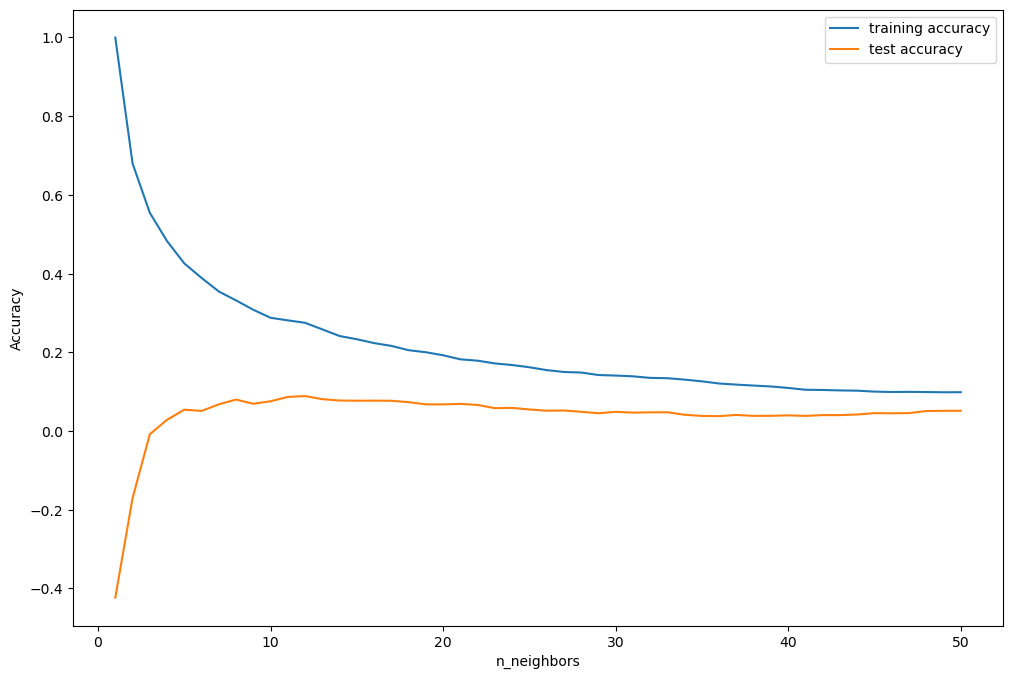

In [995]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [996]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 12


In [997]:
# INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 12)



# FITTING the model based on the training data
knn_opt_fit = knn_opt.fit(x_train, y_train)



# PREDITCING on new data
knn_opt_pred = knn_opt.predict(x_test)



# SCORING the results
print('KNN Training Score:', knn_opt.score(x_train, y_train) .round(decimals = 4))
print('KNN Testing Score :',  knn_opt.score(x_test, y_test).round(decimals = 4))


# saving scoring data for future use
knn_opt_score_train = knn_opt.score(x_train, y_train).round(decimals = 4)
knn_opt_score_test  = knn_opt.score(x_test, y_test).round(decimals = 4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_opt_score_train - knn_opt_score_test).round(decimals = 4))
knn_opt_test_gap = abs(knn_opt_score_train - knn_opt_score_test).round(decimals = 4)

KNN Training Score: 0.2749
KNN Testing Score : 0.0888
KNN Train-Test Gap: 0.1861


In [998]:
## Residual Analysis ##

# organizing residuals
model_residuals = {"True"            : y_test,
                   "Predicted"       : model_pred
                  }


# converting residuals into df
model_resid_df = pd.DataFrame(data = model_residuals)


# checking results
model_resid_df.head(n = 5)

,True,Predicted
ID,,
mb_1509,908.0,-3.175593e+15
mb_559,131.0,-8.599056e+15
mb_040,1208.0,-4.898543e+15
mb_1346,291.0,-4.649486e+15
mb_1463,1433.0,-1.019883e+16


<br>
<h3>Decision Tree Regressor</h3><br>

In [999]:
## Candidate Modeling ##
# naming the model
model_name = 'DecisionTree'

# INSTANTIATING a model object
model = DecisionTreeRegressor(max_depth = 9,
                              min_samples_leaf = 30,
                              random_state = 702)


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.7815
Testing Score  : 0.6445
Train-Test Gap : 0.137


<br>
<h3>Hyperparameter Tuning - Decision Tree Regressor</h3><br>

In [1000]:
# declaring a hyperparameter space
criterion_range = ["squared_error", "friedman_mse", "absolute_error", "poisson"]
splitter_range  = ["best", "random"]
depth_range     = np.arange(1,11, 1)
leaf_range      = np.arange(1, 251, 5)


# creating a hyperparameter grid
param_grid = {'criterion'         : criterion_range,
              'splitter'          : splitter_range,
              'max_depth'         : depth_range,
              'min_samples_leaf' : leaf_range
             }

# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeRegressor(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree, #model
                                   param_distributions   = param_grid, #hyperparameter ranges
                                   cv                    = 5, #folds
                                   n_iter                = 1000, #how many models to build
                                   random_state          = 702)


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(x_data, y_data)



# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training R-Square:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 16, 'max_depth': 10, 'criterion': 'friedman_mse'}
Tuned Training R-Square: 0.7582


In [1001]:
# naming the model
model_name = 'DecisionTree'


# INSTANTIATING a logistic regression model with tuned values
model = DecisionTreeRegressor(splitter = 'best', min_samples_leaf = 16, max_depth = 10, criterion = 'friedman_mse',random_state = 702)


# FITTING to the TRAINING data
model.fit(x_train, y_train)


# PREDICTING based on the testing set
model.predict(x_test)


# SCORING results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.8331
Testing Score  : 0.6609
Train-Test Gap : 0.1722


In [1002]:
## Residual Analysis ##

# organizing residuals
model_residuals = {"True"            : y_test,
                   "Predicted"       : model_pred
                  }


# converting residuals into df
model_resid_df = pd.DataFrame(data = model_residuals)


# checking results
model_resid_df.head(n = 5)

,True,Predicted
ID,,
mb_1509,908.0,1111.979592
mb_559,131.0,160.433333
mb_040,1208.0,1343.613636
mb_1346,291.0,459.509804
mb_1463,1433.0,699.566667


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part IV: Preparing Submission File for Kaggle</h2><br>
The code below will store the predicted values for each of the models above.

In [1003]:
# x-data
x_data_kaggle = kaggle_data[x_features].copy()


# y-data
y_data_kaggle = kaggle_data[y_variable]


# Fitting model from above to the Kaggle test data
kaggle_predictions = model.predict(x_data_kaggle)

<br>
<h3>Creating the Kaggle File</h3><br>

In [1004]:
## Kaggle Submission File ##

# organizing predictions
model_predictions = {"RENTALS" : kaggle_predictions}


# converting predictions into df
model_pred_df = pd.DataFrame(data  = model_predictions,
                             index = df_test.index)

<br>

In [1005]:
#!######################!#
#!# name the .csv file #!#
#!######################!#

# name your model
model_pred_df.to_csv(path_or_buf = "./model_output/DecisionTree.csv",
                     index       = True,
                     index_label = 'ID')

<br>

<br>
<h3>Analysis</h3><br>

Analysis Introduction 
In urban settings, the bike-sharing industry has grown quickly, promoting itself as an answer to the demands of today's transportation in cities. Beyond transportation, this rise in the Chicago metropolitan area is significant because it is linked with urban planning, sustainability, and public health. The Cook County Planning and Development Department is attempting to use machine learning's predictive ability to understand and forecast trends in bike rentals, realizing the potential of data-driven solutions. Our objective is not only to predict the number of bike rentals on a given day but also to identify the particular factors that influence this demand. The insights gained by creating a prediction model specific to Chicago's dynamics will not only guide policy and infrastructure decisions but also enhance user engagement and operational efficiency within the bike-sharing ecosystem.

Exploratory Data Analysis and Data Preprocessing

Base Modeling (Original Dataset)
This OLS regression model is constructed to understand the relationship between bike rentals and various predictors in an urban environment. The R-squared value of 0.463 shows that approximately 46.3% of the variability in bike rentals can be explained by this model. However, the large condition number warns us of potential multicollinearity issues, which means that some predictors might be highly correlated with each other, possibly distorting the effect of individual variables. 
Missing Value
One of the most important steps in the data analysis process is dealing with missing values in some of the dataset's variables. The missing data points for the variables "Visibility," "DewPointTemperature," and "SolarRadiation" are replaced with statistically representative values, such as the mean of the available data, or, if suitable, with a neutral value like zero. The substitution technique is selected to guarantee the preservation of the dataset's statistical characteristics and integrity. To further analyze the distributions of these variables, histograms are produced. Histogram analysis of the data's shape and distribution can reveal information about the underlying distributions and aid in choosing the best approach for handling missing data. This process of imputation is an essential first step in ensuring that analyses that come after, such predictive modeling, are founded on a comprehensive and carefully selected dataset.

Correlation
This heatmap provided gives us insights into how different weather-related variables relate to the number of rentals (RENTALS). Temperature shows a positive correlation of 0.32, indicating that as temperature increases, the number of rentals tends to increase as well. Conversely, humidity has a negative correlation of -0.40 with rentals, suggesting that higher humidity levels might deter people from renting bikes. Wind speed has a weaker positive correlation, suggesting a slight increase in rentals with higher wind speeds, perhaps indicating preference for bike use on breezier days.
The lack of correlation with visibility and DewPointTemperature indicates that these factors might not have a discernible impact on rental behavior. Rainfall and Snowfall have negative correlations with rentals, -0.15 and -0.09 respectively, which is intuitive as inclement weather likely reduces the desire or ability to rent bikes. Solar radiation has a positive correlation of 0.20, aligning with the idea that sunnier conditions could encourage outdoor activities like biking.
FunctioningDay shows a strong positive correlation of 0.45, highlighting that rentals are significantly higher on days when the bike-sharing system is operational. The day being a holiday has a negligible negative correlation, suggesting that holidays have a minimal effect on rental patterns. These correlations are crucial for understanding the factors that influence rental frequency and can help in making data-driven decisions for bike-sharing services.


Final Base Modeling
In this OLS regression analysis, the use of both log-transformed and non-transformed variables can be due to differences in their distributional properties. For example, if a variable exhibits high skewness, log transformation can help in normalizing its distribution, which is a common assumption for linear regression models. This transformation also helps in reducing the impact of outliers, leading to a more robust model. On the other hand, retaining the original scale of a variable can be useful when its distribution is already close to normal, or when interpretability in the original units of measurement is important. Including both types of variables allows the model to capture different aspects of the data: the raw values reflect the absolute effects, while the log-transformed values capture relative changes. The OLS regression results presented here provide a detailed analysis of the factors influencing the number of rentals. The model explains a substantial portion of the variability in rentals, with an R-squared value of 0.672, indicating that approximately 67.2% of the variance in bike rentals can be predicted from the independent variables included in the model.




Feature Engineering

Feature Engineering 1 Discomfort Index: Our forecasting models incorporate the Discomfort Index, a crucial component that assesses the joint impact of heat and humidity on human comfort. As unpleasant weather tends to keep people from going outside, it is an important indicator for gauging the possible influence on bike rental behavior. The index gives us a way to quantify pain, so we can modify our bike rental forecasts according to the predicted weather. For instance, a high Discomfort Index score on a given day may indicate a decline in bike rentals, causing bike-sharing companies to adjust their plans accordingly. In order to enhance user experience overall, city planners can also utilize the index's observations to inform the building of more climate-resilient recreational infrastructure, like shaded bike lanes or cooling stations. Therefore, the Discomfort Index helps us make data-driven decisions for future urban planning and service provision changes in addition to providing information about the state of affairs.
Feature Engineering 2 Is Raining & Snowing: The "Is Raining & Snowing" feature is essential for comprehending weather-related factors that could influence the demand for rental bicycles. The presence of precipitation, in the form of snow or rain, can discourage people from participating in outdoor bicycle activities. The model can more precisely represent the influence of weather conditions on rental frequency by combining data on snowfall and rainfall into a single binary indicator. Additionally, this functionality can be very helpful for operational planning, enabling bike-sharing companies to modify their service and supply offerings ahead of time in response to weather variations. Additionally, this functionality can be very helpful for operational planning, enabling bike-sharing companies to modify their service and supply offerings ahead of time in response to weather variations. For example, the impacts of increasing precipitation on equipment may result in a greater demand for maintenance services or the sites where bikes are supplied may change to assure availability in less impacted areas. In the end, adding this function contributes to building a more reliable and weather-responsive bike-sharing system.
Feature Engineering 3 Highlight the ExtremeTemperature: By capturing critical temperature thresholds that differ greatly from the norm, the ExtremeCold and ExtremeHot features are essential in improving the predictive model. Set below the 10th percentile of recorded temperatures, the ExtremeCold indicator records those few but potentially significant cold spells that might significantly alter patterns of bike rentals. On the other hand, the ExtremeHot function, which is engaged above the 90th percentile, identifies hot spots that may raise the danger of heatstroke. By adding these binary flags to our dataset, we are able to quantify the possible effects of these extremes on many facets of urban life in addition to recognizing their existence. 
Feature Engineering 4: Meteorological Conditions Composition
Muggy: The 'Muggy' feature is a binary indicator that captures weather conditions that include high temperatures and high humidity, which frequently cause a considerable degree of discomfort for people. The intense heat and humidity in the air can deter people from engaging in outdoor activities, thus this weather pattern is important for forecasting how often people will hire bikes. Furthermore, hot weather can influence patterns of energy consumption by encouraging people to use air conditioning as a means of relief, which raises energy consumption. The algorithm can more accurately forecast peak energy demand and reduced outdoor activities during humid conditions by quantifying them. 
ColdDry: Periods of low humidity and low temperatures, which can have a significant impact on human comfort and activity, are encompassed by the 'ColdDry' function. This binary variable aids in calculating the increased demand for heating systems, which makes it essential for models that forecast energy consumption. Furthermore, industries that depend on winter weather, like winter sports facilities, depend heavily on the occurrence of cold, dry weather. This feature enables a tailored approach to analyzing and predicting the impact of weather on both daily living and specific economic activities by defining precise limits for both temperature and humidity. Predictive models that incorporate 'ColdDry' are better equipped to handle the subtleties of weather impacts, allowing services and resources to be more appropriately tailored to meet demand during the winter months.
Feature Engineering 5: Heat Index
Often named the "apparent temperature," the heat index is an essential statistic in feature engineering for weather-related behavior models. It is computed to represent the combined impact of humidity and air temperature on the degree of perceived human comfort. Given that high humidity can intensify the sensation of heat, this indicator is especially useful for health and safety planning in the warmer months. For example, a greater heat index may discourage people from going outside, which could affect forecasts for bike-sharing programs. Furthermore, by adding the heat index to our model, we can improve the way we analyze seasonal patterns and predict changes in rental rates. This measure provides a detailed input variable that closely matches the physiological effects of weather conditions, so bridging the gap between raw meteorological data and end-users experiential reality. (Heat Index Equation, n.d.)
Feature Engineering 6: Update Time-of-Day columns 
o  The improvement of time-of-day columns demonstrates how feature engineering uses domain knowledge in a sophisticated way. We may add temporal context to our model by breaking the day up into distinct intervals based on the hour, such as Morning, Afternoon, Evening, and Night. The model can now more effectively capture and utilize everyday patterns in human behavior, which frequently coincide with these time segments, thanks to this division. For example, bike rentals may increase in the morning as commuters head to work, while evening hours may be a reflection of leisure or fitness-related activity. Insights like peak demand periods are also revealed by this segmentation, and these insights can be crucial for operational planning and resource allocation. This procedure not only improves the quality of the dataset but also helps the predictive model better fit the daily ups and downs of a city's rhythmic pulse.



Candidate Model Development and Final Model Selection 

The model name 'Lasso', the alpha value, a hyperparameter for the Lasso regression, is set at approximately 0.01098, indicating the degree of regularization applied to the model. 
The training score of 0.6678 and the testing score of 0.6658 are quite close, which suggests that the model performs consistently on both the training data and unseen testing data. 
The train-test gap is 0.002, which is a small difference between the training and testing scores. A small gap is typically a good sign, indicating that the model is not overfitting the training data. 
The Ridge regression model showcased here displays a well-tuned balance between bias and variance, as evidenced by the small train-test score gap of 0.0014, which suggests minimal overfitting. The model’s alpha parameter, set at a low value, implies only a modest amount of regularization, which is appropriate given the high training and testing scores of approximately 0.67. The use of 15,000 maximum iterations ensures that the model has ample opportunity to converge to a solution. This consistency in performance between the training and test sets indicates a robust model that is likely to perform well on new, unseen data. 
The Decision Tree Regressor is finalized as the model of choice due to its strong performance metrics and its capability to handle the complexity within the data. It achieves a solid training score of 0.8331 and a testing score of 0.6609, indicating its effectiveness in learning from the training set and generalizing to unseen data. The gap between training and testing performance is 0.1722, which, while larger than some models, suggests that with proper tuning for generalization, the model could be less prone to overfitting. The choice of 'best' for the splitter, a minimum of 16 samples per leaf, and a max depth of 10, reflects a careful balance between model complexity and prediction accuracy. This Decision Tree's structure offers clear insights into the decision-making process, making it an ideal choice for interpretability and practical application in predicting outcomes.


References
Heat Index Equation. (n.d.). Www.wpc.ncep.noaa.gov. https://www.wpc.ncep.noaa.gov/html/heatindex_equation.shtml
Open AI. (2022). ChatGPT (Dec 20 version) [Heat Index]. https://chat.openai.com/

<br>